In [52]:
from pyspark.sql import SparkSession

In [53]:
spark = SparkSession.builder \
.master("local") \
.appName("Neural Network Model") \
.config("spark.executor.memory", "6gb") \
.getOrCreate()
sc = spark.sparkContext

In [54]:
df = spark.createDataFrame([('Male', 67, 150),
                            ('Female', 65, 135),
                            ('Female', 68, 130),
                            ('Male', 70, 160),
                            ('Female', 70, 130),
                            ('Male', 69, 174),
                            ('Female', 65, 126),
                            ('Male', 74, 188),
                            ('Female', 60, 110),
                            ('Female', 63, 125),
                            ('Male', 70, 173),
                            ('Male', 70, 145),
                            ('Male', 68, 175),
                            ('Female', 65, 123),
                            ('Male', 71, 145),
                            ('Male', 74, 160),
                            ('Female', 64, 135),
                            ('Male', 71, 175),
                            ('Male', 67, 145),
                            ('Female', 67, 130),
                            ('Male', 70, 162),
                            ('Female', 64, 107),
                            ('Male', 70, 175),
                            ('Female', 64, 130),
                            ('Male', 66, 163),
                            ('Female', 63, 137),
                            ('Male', 65, 165),
                            ('Female', 65, 130),
                            ('Female', 64, 109)],
                            ['gender', 'height', 'weight']) #header values

In [55]:
df.show(5)

+------+------+------+
|gender|height|weight|
+------+------+------+
|  Male|    67|   150|
|Female|    65|   135|
|Female|    68|   130|
|  Male|    70|   160|
|Female|    70|   130|
+------+------+------+
only showing top 5 rows


In [56]:
from pyspark.sql import functions

In [57]:
#modify gender column to a numeric value
#male = 1, female = 0
df = df.withColumn('gender', functions.when(df['gender']=='Female',0).otherwise(1))

In [58]:
#reorder columns so that gender is the last column in the dataframe
df = df.select('height', 'weight', 'gender')

In [59]:
#import numpy as np
import numpy as np

#Converting a PySpark DataFrame to a numpy array
#the end goal here is to move the data to a numpy array
#this lets us view the data collected 
df.select("height", "weight", "gender").collect()



[Row(height=67, weight=150, gender=1),
 Row(height=65, weight=135, gender=0),
 Row(height=68, weight=130, gender=0),
 Row(height=70, weight=160, gender=1),
 Row(height=70, weight=130, gender=0),
 Row(height=69, weight=174, gender=1),
 Row(height=65, weight=126, gender=0),
 Row(height=74, weight=188, gender=1),
 Row(height=60, weight=110, gender=0),
 Row(height=63, weight=125, gender=0),
 Row(height=70, weight=173, gender=1),
 Row(height=70, weight=145, gender=1),
 Row(height=68, weight=175, gender=1),
 Row(height=65, weight=123, gender=0),
 Row(height=71, weight=145, gender=1),
 Row(height=74, weight=160, gender=1),
 Row(height=64, weight=135, gender=0),
 Row(height=71, weight=175, gender=1),
 Row(height=67, weight=145, gender=1),
 Row(height=67, weight=130, gender=0),
 Row(height=70, weight=162, gender=1),
 Row(height=64, weight=107, gender=0),
 Row(height=70, weight=175, gender=1),
 Row(height=64, weight=130, gender=0),
 Row(height=66, weight=163, gender=1),
 Row(height=63, weight=13

In [60]:
#store the values in a numpy array called data_array
data_array = np.array(df.select("height", "weight", "gender",).collect())

In [61]:
#change lbs to kg and inches to cm

data_array[:, 0] = data_array[:, 0] * 2.54
data_array[:, 1] = data_array[:, 1] * 0.45359237

In [62]:
#access the first row of the array
data_array[0]

array([170,  68,   1])

In [63]:
#access the final row
data_array[28]

array([162,  49,   0])

In [64]:
#look at the sahpe of the array, 29 rows, 3 columns
data_array.shape

(29, 3)

In [65]:
#retrieve the maximum and minimum of the height, weight and gender 
print(data_array.max(axis=0))
print(data_array.min(axis=0))

[187  85   1]
[152  48   0]


In [66]:
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#determine the max and min values for both the y-axis and the x-axis
#a ten point pixel buffer has been added to each axis to ensure all data points are captured without being cut out
max_x = data_array.max(axis=0) [0]+10
min_x = data_array.min(axis=0) [0]-10
 
max_y = data_array.max(axis=0) [1]+10
min_y = data_array.min(axis=0) [1]-10

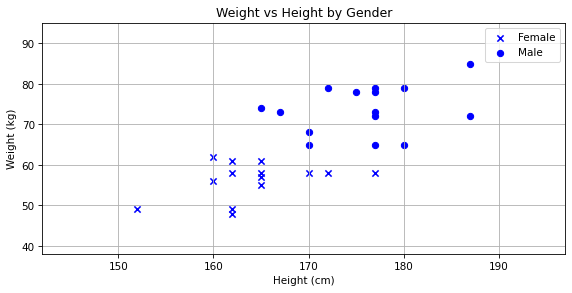

In [68]:
#plot the height and weight for each gender
#format the plot grid, scales, and figure size

plt.figure(figsize=(9, 4), dpi= 75)
plt.axis([min_x, max_x, min_y, max_y])
plt.grid()
for i in range (len(data_array)):
    value = data_array[i]
    #assign the labels values to specific matrix elements
    gender = value[2]
    height = value[0]
    weight = value[1]

    #filter data points by gender
    a = plt.scatter(height[gender==0], weight[gender==0], marker = 'x', c = 'b', label = 'Female')
    b = plt.scatter(height[gender==1], weight[gender==1], marker = 'o', c = 'b', label = 'Male')

    #plot values, titles, legends and x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.legend(handles=[a,b])

We can see that there is a clear divide between the bottom left quadrant and the top right quadrant there is no data point for a Female that is over 65 kg and taller than 178 cm, for Males there are no data points shorter than 163cm and under 60 kg.

## Setting up Weights and Biases for Input into the Neural Network
### 1. Input Data
### 2. Add the weights and biases
### 3. Sum the product of the data and weights
### 4. Apply an acitvation function
### 5. Evaluate the  output and compare it to the desired outcome

In [69]:
#set the randomness of the value generator
np.random.seed(12345)

In [70]:
#set the weights and biases
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [71]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


## Noramlization of the input data for the Neural Network
We require the Mean and Standard Deviation of the values to for the final calculation

In [72]:
#slice the array inputs and outputs 
X = data_array[:,:2]
Y = data_array[:,2]

In [73]:
#calculate the mean and the standard deviation
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)

In [74]:
#create the normalization function to normalize x
# X - mean / std
def normalize(X):
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [75]:
X = normalize(X)
print(X)

[[-0.02894094  0.26910317]
 [-0.62843191 -0.42238978]
 [ 0.21085544 -0.7187439 ]
 [ 0.81034641  0.66424199]
 [ 0.81034641 -0.7187439 ]
 [ 0.57055003  1.25695023]
 [-0.62843191 -0.81752861]
 [ 2.00932835  1.94844318]
 [-2.18710843 -1.60780626]
 [-1.22792288 -0.91631331]
 [ 0.81034641  1.25695023]
 [ 0.81034641 -0.02725095]
 [ 0.21085544  1.35573494]
 [-0.62843191 -1.01509802]
 [ 1.170041   -0.02725095]
 [ 2.00932835  0.66424199]
 [-0.98812649 -0.42238978]
 [ 1.170041    1.35573494]
 [-0.02894094 -0.02725095]
 [-0.02894094 -0.7187439 ]
 [ 0.81034641  0.7630267 ]
 [-0.98812649 -1.70659096]
 [ 0.81034641  1.35573494]
 [-0.98812649 -0.7187439 ]
 [-0.38863553  0.7630267 ]
 [-1.22792288 -0.32360507]
 [-0.62843191  0.8618114 ]
 [-0.62843191 -0.7187439 ]
 [-0.98812649 -1.60780626]]


## Validating Array for Optimal Neural Network Performance


In [76]:
#print the std and mean of array inputs
print('standard deviation')
print(round(X[:,0].std(axis=0),0))
print('mean')
print(round(X[:,0].mean(axis=0), 0))

standard deviation
1.0
mean
0.0


In [77]:
#the original data_array is no longer useful for a neural network because it contains the original non-normalized input values

#we use the numpy.stack() function to restructure the height, weight and gender data points
data_array = np.column_stack((X[:,0], X[:,1],Y))
print(data_array)

[[-0.02894094  0.26910317  1.        ]
 [-0.62843191 -0.42238978  0.        ]
 [ 0.21085544 -0.7187439   0.        ]
 [ 0.81034641  0.66424199  1.        ]
 [ 0.81034641 -0.7187439   0.        ]
 [ 0.57055003  1.25695023  1.        ]
 [-0.62843191 -0.81752861  0.        ]
 [ 2.00932835  1.94844318  1.        ]
 [-2.18710843 -1.60780626  0.        ]
 [-1.22792288 -0.91631331  0.        ]
 [ 0.81034641  1.25695023  1.        ]
 [ 0.81034641 -0.02725095  1.        ]
 [ 0.21085544  1.35573494  1.        ]
 [-0.62843191 -1.01509802  0.        ]
 [ 1.170041   -0.02725095  1.        ]
 [ 2.00932835  0.66424199  1.        ]
 [-0.98812649 -0.42238978  0.        ]
 [ 1.170041    1.35573494  1.        ]
 [-0.02894094 -0.02725095  1.        ]
 [-0.02894094 -0.7187439   0.        ]
 [ 0.81034641  0.7630267   1.        ]
 [-0.98812649 -1.70659096  0.        ]
 [ 0.81034641  1.35573494  1.        ]
 [-0.98812649 -0.7187439   0.        ]
 [-0.38863553  0.7630267   1.        ]
 [-1.22792288 -0.32360507

## Setting up the activation function with Sigmoid

The Activation Function is used in a neural network to help determine the output in this case 0 - female or 1 - male.
Yes or No
True or False

In [78]:
#create the sigmoid function 
def sigmoid(input):
    return 1 / (1+np.exp(-input))

In [79]:
#create sample x values for the sigmoid curve
X = np.arange(-10, 10, 1)

In [80]:
#create sample y values for the sigmoid curve
Y = sigmoid(X)

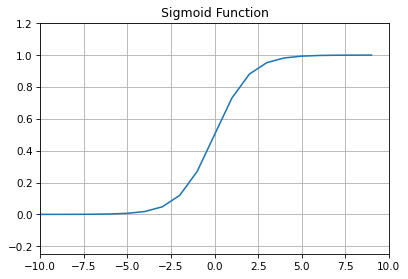

In [81]:
import os
os.environ["SPARK_LOCAL_IP"] = "192.168.1.12"

#plot the x and y values for these points
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10, 10, -0.25, 1.2])
plt.grid()
plt.plot(X, Y)
plt.title('Sigmoid Function')
plt.show()

In [82]:
#create the derivative of the sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

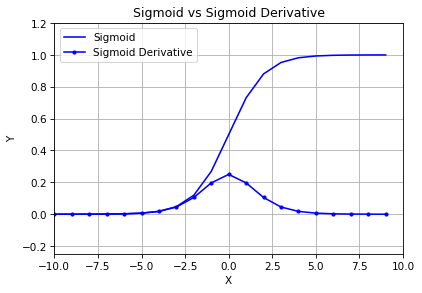

In [83]:
#plot the derivative of the sigmoid function alongside the original sigmoid function
plt.figure(figsize=(6, 4), dpi=75)
plt.axis([-10, 10, -0.25, 1.2])
plt.grid()
X = np.arange(-10, 10, 1)
Y = sigmoid(X)
Y_Prime = sigmoid_derivative(X)
c=plt.plot(X, Y, label="Sigmoid", c='b')
d=plt.plot(X, Y_Prime, marker=".", label="Sigmoid Derivative", c='b')
plt.title('Sigmoid vs Sigmoid Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Calculating the Cost Function in a Neural Network

In [84]:
#Set a learning rate of 0.1
learningRate = 0.1

In [85]:
#initiate a pyhton list allCosts
allCosts = []

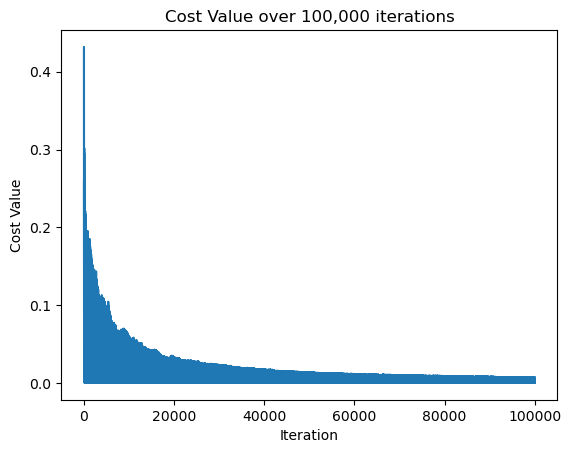

The final values of w1, w2, and b
----------------------------------
w1 = 2.2911986753447144
w2 = 10.497454873372716
b  = 2.731155353467937


In [86]:
for i in range(100000):
    random_number = np.random.randint(len(data_array))
    random_person = data_array[random_number]
    
    height = random_person[0]
    weight = random_person[1]

    z = w1*height+w2*weight+b
    predictedGender = sigmoid(z)
    
    actualGender = random_person[2]
    
    cost = (predictedGender-actualGender)**2
    
    
    ##############################
    allCosts.append(cost)
    ##############################
    
    dcost_prediction = 2 * (predictedGender-actualGender)
    dprediction_dz = sigmoid_derivative(z)
    dz_dw1 = random_person[0]
    dz_dw2 = random_person[1]
    dz_db = 1
    
    dcost_dw1 = dcost_prediction * dprediction_dz * dz_dw1
    dcost_dw2 = dcost_prediction * dprediction_dz * dz_dw2
    dcost_db  = dcost_prediction * dprediction_dz * dz_db
    
    w1 = w1 - learningRate * dcost_dw1
    w2 = w2 - learningRate * dcost_dw2
    b  = b  - learningRate * dcost_db

plt.plot(allCosts)
plt.title('Cost Value over 100,000 iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

print("The final values of w1, w2, and b")
print("----------------------------------")
print('w1 = {}'.format(w1))
print('w2 = {}'.format(w2))
print('b  = {}'.format(b))
# print(all_costs)

In [87]:
for i in range(len(data_array)):
    random_individual = data_array[i]
    height = random_individual[0]
    weight = random_individual[1]
    z = height*w1 + weight*w2 + b
    predictedGender = sigmoid(z)
    print("Individual #{} actual score: {} predicted score: {}".format(i+1,random_individual[2], predictedGender))

Individual #1 actual score: 1.0 predicted score: 0.9958880776800022
Individual #2 actual score: 0.0 predicted score: 0.04137890586591973
Individual #3 actual score: 0.0 predicted score: 0.012987253539727241
Individual #4 actual score: 1.0 predicted score: 0.9999904663208108
Individual #5 actual score: 0.0 predicted score: 0.049399120976571204
Individual #6 actual score: 1.0 predicted score: 0.9999999672111453
Individual #7 actual score: 0.0 predicted score: 0.0006814018838391169
Individual #8 actual score: 1.0 predicted score: 0.9999999999991458
Individual #9 actual score: 0.0 predicted score: 4.784816198085333e-09
Individual #10 actual score: 0.0 predicted score: 6.120517736170576e-05
Individual #11 actual score: 1.0 predicted score: 0.9999999810715229
Individual #12 actual score: 1.0 predicted score: 0.9866362330706142
Individual #13 actual score: 1.0 predicted score: 0.9999999734976761
Individual #14 actual score: 0.0 predicted score: 8.569309158051209e-05
Individual #15 actual scor

## Predicting Gender based on Height and Weight

In [88]:
#create a function to input new height and weight values for normalization
def input_normalize(height, weight):
    inputHeight = (height - x_mean[0])/x_std[0]
    inputWeight = (weight - x_mean[1])/x_std[1]
    return inputHeight, inputWeight
    

In [89]:
#assign a variable called score to the values 177cm and 81kg
score = input_normalize(177, 81)

In [90]:
#create a function to output a probability score between 0 and 1, by applying the summation with w1, w2, b as well as the sigmoid function
def predict_gender(raw_score):
    gender_summation = raw_score[0]*w1 + raw_score[1]*w2 +b
    gender_score = sigmoid(gender_summation)
    if gender_score <= 0.5:
        gender = "Female"
    else:
        gender = "Male"
    return gender, gender_score

In [91]:
predict_gender(score)

('Male', np.float64(0.9999999991565853))

In [92]:
score0 = input_normalize(160, 64)
predict_gender(score0)

('Female', np.float64(0.1969742800327635))

## Visualizing prediction scores

In [95]:
#compute the minimum and maximum points of the graph
x_min = min(data_array[:,0])-0.1
x_max = max(data_array[:,0])+0.1

y_min = min(data_array[:,1])-0.1
y_max = max(data_array[:,1])+0.1

increment = 0.05

print (x_min, x_max, y_min, y_max)

-2.2871084337736263 2.109328353145525 -1.806590963395881 2.0484431757733397


In [96]:
#generate x and y values in increments of 0.05, and then create an array 
x_data= np.arange(x_min, x_max, increment)
y_data= np.arange(y_min, y_max, increment)
xy_data = [[x_all, y_all] for x_all in x_data for y_all in y_data]

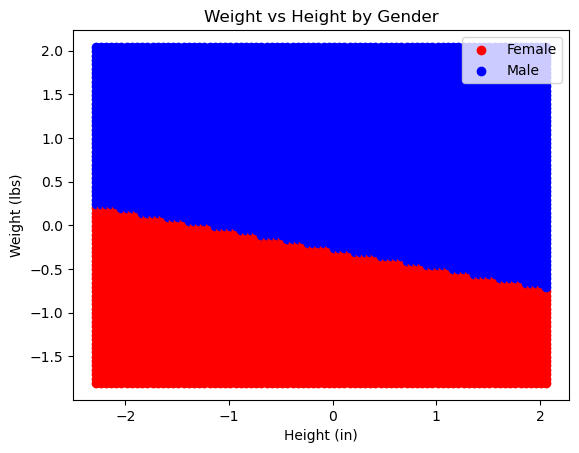

In [97]:
for i in range(len(xy_data)):
    data = (xy_data[i])
    height = data[0]
    weight = data[1]  
    z_new = height*w1 + weight*w2 + b
    predictedGender_new=sigmoid(z_new)
    # print(height, weight, predictedGender_new)
    ax = plt.scatter(height[predictedGender_new<=0.5],
                     weight[predictedGender_new<=0.5], 
                     marker = 'o', c= 'r', label = 'Female')
    bx = plt.scatter(height[predictedGender_new > 0.5],
                     weight[predictedGender_new>0.5], 
                     marker = 'o', c= 'b', label = 'Male')    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[ax,bx])